In [19]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

# Spectrums

mos

/Users/eusracenorth/Documents/work/XGAP-ABUN/data/ID3460/fitting


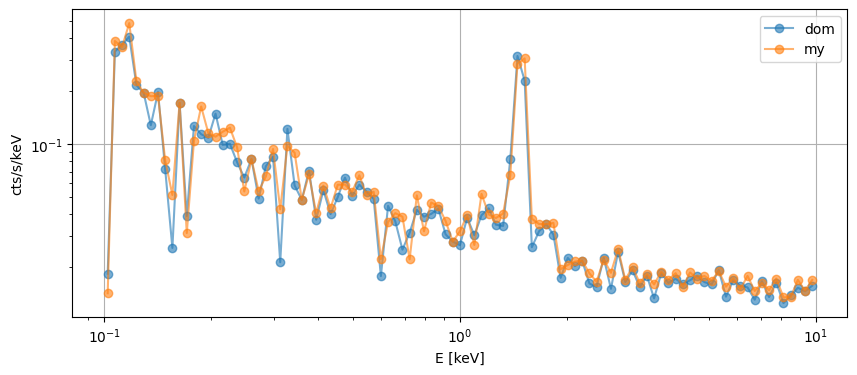

In [57]:
### ID ###
SRCNAME1 = 'ID3460'
SRCNAME2 = 'SDSSTG3460'

### par ###
REGNAME = 'bkg'

dompath = glob(f'/Users/eusracenorth/Documents/work/XGAP-ABUN/data/{SRCNAME1}/eckert/{SRCNAME1}/*')[0]
mypath = f'/Users/eusracenorth/Documents/work/XGAP-ABUN/data/{SRCNAME1}/fitting'
print(mypath)
with fits.open(f'{dompath}/{SRCNAME2}_{REGNAME}/mos1S001-obj-{SRCNAME2}_{REGNAME}.pi') as f:
    chan = f[1].data['CHANNEL']
    domspec = f[1].data['COUNTS']
    exp = float(f[1].header['EXPOSURE'])

with fits.open(f'{mypath}/{REGNAME}/mos1S001-fovt.pi') as f:
    myspec = f[1].data['COUNTS']

with fits.open(f'{dompath}/{SRCNAME2}_{REGNAME}/mos1S001-{SRCNAME2}_{REGNAME}.rmf') as f:
    emin = f[2].data['E_MIN']
    emax = f[2].data['E_MAX']


# # linearly Bin the data
# bin_factor = 10
# binned_emin = np.mean(emin.reshape(-1, bin_factor), axis=1)
# binned_chan = np.mean(chan.reshape(-1, bin_factor), axis=1)
# binned_domspec = np.sum(domspec.reshape(-1, bin_factor), axis=1)
# binned_myspec = np.sum(myspec.reshape(-1, bin_factor), axis=1)

## log bin the data
# Logarithmic binning parameters
min_energy_keV = 0.1  # Minimum energy in keV
max_energy_keV = 10.0  # Maximum energy in keV
num_bins = 100  # Number of logarithmic bins
# Create logarithmic energy bins
log_energy_bins = np.logspace(np.log10(min_energy_keV), np.log10(max_energy_keV), num_bins)

# Perform log binning
binned_energy = np.sqrt(log_energy_bins[:-1] * log_energy_bins[1:])
binned_domspec = np.histogram(emin, bins=log_energy_bins, weights=domspec / exp)[0]
binned_myspec = np.histogram(emin, bins=log_energy_bins, weights=myspec / exp)[0]

plt.figure(figsize=(10, 4))
# plt.plot(binned_chan, binned_domspec / exp, label = 'dom', marker='o', linestyle='-')
# plt.plot(binned_chan, binned_myspec / exp, label = 'my', marker='o', linestyle='-')
# plt.title('Channel versus Counts per Channel')
# plt.xlabel('Channel')
# plt.ylabel('cts/s/channel')

plt.plot(binned_energy, binned_domspec/np.diff(np.insert(binned_energy,0,0)), label = 'dom', marker='o', linestyle='-', alpha = 0.6)
plt.plot(binned_energy, binned_myspec/np.diff(np.insert(binned_energy,0,0)), label = 'my', marker='o', linestyle='-', alpha = 0.6)
# plt.title('Channel versus Counts per Channel')
plt.xlabel('E [keV]')
plt.ylabel('cts/s/keV')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)



pn

/Users/eusracenorth/Documents/work/XGAP-ABUN/data/ID3460/fitting


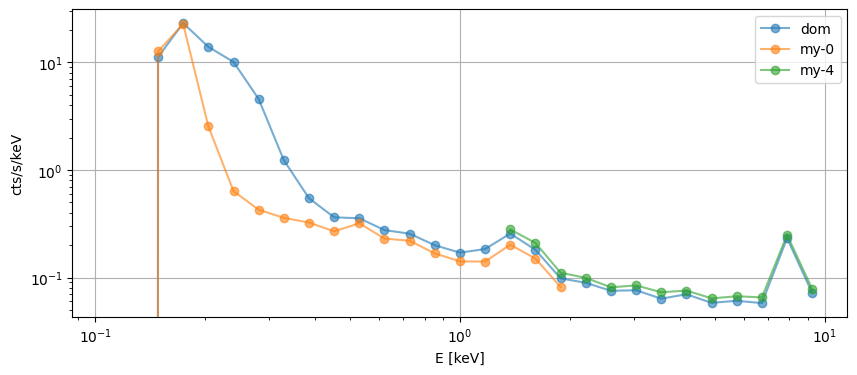

In [75]:
### ID ###
SRCNAME1 = 'ID3460'
SRCNAME2 = 'SDSSTG3460'

### par ###
REGNAME = 'bkg'

dompath = glob(f'/Users/eusracenorth/Documents/work/XGAP-ABUN/data/{SRCNAME1}/eckert/{SRCNAME1}/*')[0]
mypath = f'/Users/eusracenorth/Documents/work/XGAP-ABUN/data/{SRCNAME1}/fitting'
print(mypath)

with fits.open(f'{dompath}/{SRCNAME2}_bkg/pnS003-obj-{SRCNAME2}_bkg.pi') as f:
    chan = f[1].data['CHANNEL']
    domspec = f[1].data['COUNTS']
    exp = float(f[1].header['EXPOSURE'])

with fits.open(f'{mypath}/bkg/pnS003-0-fovt.pi') as f:
    myspec_0 = f[1].data['COUNTS']

with fits.open(f'{mypath}/bkg/pnS003-4-fovt.pi') as f:
    myspec_4 = f[1].data['COUNTS']

with fits.open(f'{dompath}/{SRCNAME2}_bkg/pnS003-{SRCNAME2}_bkg.rmf') as f:
    emin = f[2].data['E_MIN']
    emax = f[2].data['E_MAX']


# # linearly Bin the data
# bin_factor = 10
# binned_emin = np.mean(emin.reshape(-1, bin_factor), axis=1)
# binned_chan = np.mean(chan.reshape(-1, bin_factor), axis=1)
# binned_domspec = np.sum(domspec.reshape(-1, bin_factor), axis=1)
# binned_myspec = np.sum(myspec.reshape(-1, bin_factor), axis=1)

## log bin the data
# Logarithmic binning parameters
min_energy_keV = 0.1  # Minimum energy in keV
max_energy_keV = 10.0  # Maximum energy in keV
num_bins = 30  # Number of logarithmic bins
# Create logarithmic energy bins
log_energy_bins = np.logspace(np.log10(min_energy_keV), np.log10(max_energy_keV), num_bins)

# Perform log binning
binned_energy = np.sqrt(log_energy_bins[:-1] * log_energy_bins[1:])
binned_domspec = np.histogram(emin, bins=log_energy_bins, weights=domspec / exp)[0]
binned_myspec_0 = np.histogram(emin, bins=log_energy_bins, weights=myspec_0 / exp)[0]
binned_myspec_4 = np.histogram(emin, bins=log_energy_bins, weights=myspec_4 / exp)[0]

plt.figure(figsize=(10, 4))
# plt.plot(binned_chan, binned_domspec / exp, label = 'dom', marker='o', linestyle='-')
# plt.plot(binned_chan, binned_myspec / exp, label = 'my', marker='o', linestyle='-')
# plt.title('Channel versus Counts per Channel')
# plt.xlabel('Channel')
# plt.ylabel('cts/s/channel')

plt.plot(binned_energy, binned_domspec/np.diff(np.insert(binned_energy,0,0)), label = 'dom', marker='o', linestyle='-', alpha = 0.6)
pat0_msk = binned_energy<=2
plt.plot(binned_energy[pat0_msk], binned_myspec_0[pat0_msk]/np.diff(np.insert(binned_energy[pat0_msk],0,0)), label = 'my-0', marker='o', linestyle='-', alpha = 0.6)
pat4_msk = binned_energy>1
plt.plot(binned_energy[pat4_msk][1:], binned_myspec_4[pat4_msk][1:]/np.diff(binned_energy[pat4_msk]), label = 'my-4', marker='o', linestyle='-', alpha = 0.6)
# plt.plot(binned_energy, binned_myspec_4/np.diff(np.insert(binned_energy,0,0)), label = 'my-4', marker='o', linestyle='-', alpha = 0.3)

# plt.title('Channel versus Counts per Channel')
plt.xlabel('E [keV]')
plt.ylabel('cts/s/keV')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)



# QPB

MOS

/Users/eusracenorth/Documents/work/XGAP-ABUN/data/ID3460/fitting


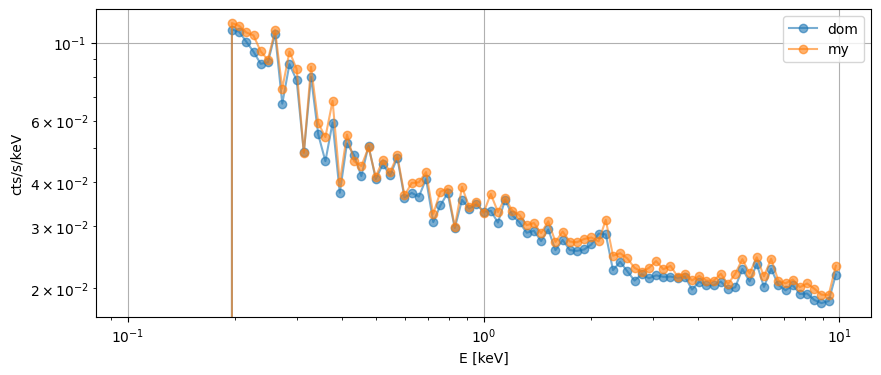

In [59]:
### ID ###
SRCNAME1 = 'ID3460'
SRCNAME2 = 'SDSSTG3460'

### par ###
REGNAME = 'bkg'

dompath = glob(f'/Users/eusracenorth/Documents/work/XGAP-ABUN/data/{SRCNAME1}/eckert/{SRCNAME1}/*')[0]
mypath = f'/Users/eusracenorth/Documents/work/XGAP-ABUN/data/{SRCNAME1}/fitting'
print(mypath)
with fits.open(f'{dompath}/{SRCNAME2}_{REGNAME}/mos2S002-back-{SRCNAME2}_{REGNAME}.pi') as f:
    chan = f[1].data['CHANNEL']
    domspec = f[1].data['COUNTS']
    exp = float(f[1].header['EXPOSURE'])

with fits.open(f'{mypath}/{REGNAME}/mos2S002-bkg.pi') as f:
    myspec = f[1].data['COUNTS']

with fits.open(f'{dompath}/{SRCNAME2}_{REGNAME}/mos2S002-{SRCNAME2}_{REGNAME}.rmf') as f:
    emin = f[2].data['E_MIN']
    emax = f[2].data['E_MAX']


# # linearly Bin the data
# bin_factor = 10
# binned_emin = np.mean(emin.reshape(-1, bin_factor), axis=1)
# binned_chan = np.mean(chan.reshape(-1, bin_factor), axis=1)
# binned_domspec = np.sum(domspec.reshape(-1, bin_factor), axis=1)
# binned_myspec = np.sum(myspec.reshape(-1, bin_factor), axis=1)

## log bin the data
# Logarithmic binning parameters
min_energy_keV = 0.1  # Minimum energy in keV
max_energy_keV = 10.0  # Maximum energy in keV
num_bins = 100  # Number of logarithmic bins
# Create logarithmic energy bins
log_energy_bins = np.logspace(np.log10(min_energy_keV), np.log10(max_energy_keV), num_bins)

# Perform log binning
binned_energy = np.sqrt(log_energy_bins[:-1] * log_energy_bins[1:])
binned_domspec = np.histogram(emin, bins=log_energy_bins, weights=domspec / exp)[0]
binned_myspec = np.histogram(emin, bins=log_energy_bins, weights=myspec / exp)[0]

plt.figure(figsize=(10, 4))
# plt.plot(binned_chan, binned_domspec / exp, label = 'dom', marker='o', linestyle='-')
# plt.plot(binned_chan, binned_myspec / exp, label = 'my', marker='o', linestyle='-')
# plt.title('Channel versus Counts per Channel')
# plt.xlabel('Channel')
# plt.ylabel('cts/s/channel')

plt.plot(binned_energy, binned_domspec/np.diff(np.insert(binned_energy,0,0)), label = 'dom', marker='o', linestyle='-', alpha = 0.6)
plt.plot(binned_energy, binned_myspec/np.diff(np.insert(binned_energy,0,0)), label = 'my', marker='o', linestyle='-', alpha = 0.6)
# plt.title('Channel versus Counts per Channel')
plt.xlabel('E [keV]')
plt.ylabel('cts/s/keV')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)



PN

/Users/eusracenorth/Documents/work/XGAP-ABUN/data/ID3460/fitting


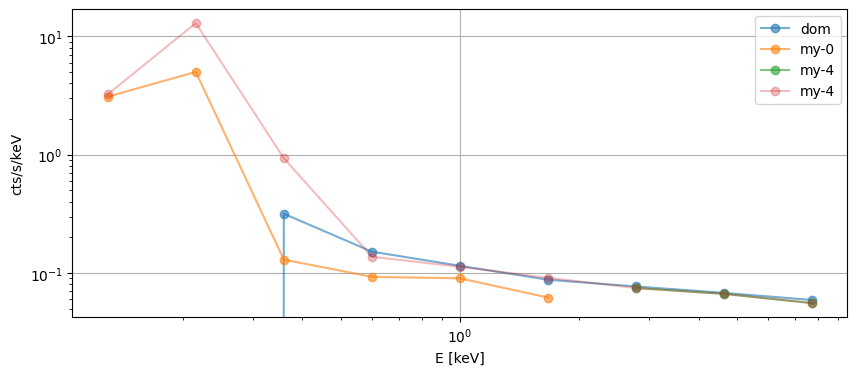

In [73]:
### ID ###
SRCNAME1 = 'ID3460'
SRCNAME2 = 'SDSSTG3460'

### par ###
REGNAME = 'bkg'

dompath = glob(f'/Users/eusracenorth/Documents/work/XGAP-ABUN/data/{SRCNAME1}/eckert/{SRCNAME1}/*')[0]
mypath = f'/Users/eusracenorth/Documents/work/XGAP-ABUN/data/{SRCNAME1}/fitting'
print(mypath)


with fits.open(f'{dompath}/{SRCNAME2}_bkg/pnS003-back-{SRCNAME2}_bkg.pi') as f:
    chan = f[1].data['CHANNEL']
    domspec = f[1].data['RATE']
    exp = float(f[1].header['EXPOSURE'])

with fits.open(f'{mypath}/bkg/pnS003-0-bkg.pi') as f:
    myspec_0 = f[1].data['RATE']

with fits.open(f'{mypath}/bkg/pnS003-4-bkg.pi') as f:
    myspec_4 = f[1].data['RATE']

with fits.open(f'{dompath}/{SRCNAME2}_bkg/pnS003-{SRCNAME2}_bkg.rmf') as f:
    emin = f[2].data['E_MIN']
    emax = f[2].data['E_MAX']


# # linearly Bin the data
# bin_factor = 10
# binned_emin = np.mean(emin.reshape(-1, bin_factor), axis=1)
# binned_chan = np.mean(chan.reshape(-1, bin_factor), axis=1)
# binned_domspec = np.sum(domspec.reshape(-1, bin_factor), axis=1)
# binned_myspec = np.sum(myspec.reshape(-1, bin_factor), axis=1)

## log bin the data
# Logarithmic binning parameters
min_energy_keV = 0.1  # Minimum energy in keV
max_energy_keV = 10.0  # Maximum energy in keV
num_bins = 10  # Number of logarithmic bins
# Create logarithmic energy bins
log_energy_bins = np.logspace(np.log10(min_energy_keV), np.log10(max_energy_keV), num_bins)

# Perform log binning
binned_energy = np.sqrt(log_energy_bins[:-1] * log_energy_bins[1:])
binned_domspec = np.histogram(emin, bins=log_energy_bins, weights=domspec)[0]
binned_myspec_0 = np.histogram(emin, bins=log_energy_bins, weights=myspec_0)[0]
binned_myspec_4 = np.histogram(emin, bins=log_energy_bins, weights=myspec_4)[0]

plt.figure(figsize=(10, 4))
# plt.plot(binned_chan, binned_domspec / exp, label = 'dom', marker='o', linestyle='-')
# plt.plot(binned_chan, binned_myspec / exp, label = 'my', marker='o', linestyle='-')
# plt.title('Channel versus Counts per Channel')
# plt.xlabel('Channel')
# plt.ylabel('cts/s/channel')

plt.plot(binned_energy, binned_domspec/np.diff(np.insert(binned_energy,0,0)), label = 'dom', marker='o', linestyle='-', alpha = 0.6)
pat0_msk = binned_energy<=2
plt.plot(binned_energy[pat0_msk], binned_myspec_0[pat0_msk]/np.diff(np.insert(binned_energy[pat0_msk],0,0)), label = 'my-0', marker='o', linestyle='-', alpha = 0.6)
pat4_msk = binned_energy>1
plt.plot(binned_energy[pat4_msk][1:], binned_myspec_4[pat4_msk][1:]/np.diff(binned_energy[pat4_msk]), label = 'my-4', marker='o', linestyle='-', alpha = 0.6)
plt.plot(binned_energy, binned_myspec_4/np.diff(np.insert(binned_energy,0,0)), label = 'my-4', marker='o', linestyle='-', alpha = 0.3)

# plt.title('Channel versus Counts per Channel')
plt.xlabel('E [keV]')
plt.ylabel('cts/s/keV')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)



# SPEC-QPB

MOS

/Users/eusracenorth/Documents/work/XGAP-ABUN/data/ID3460/fitting


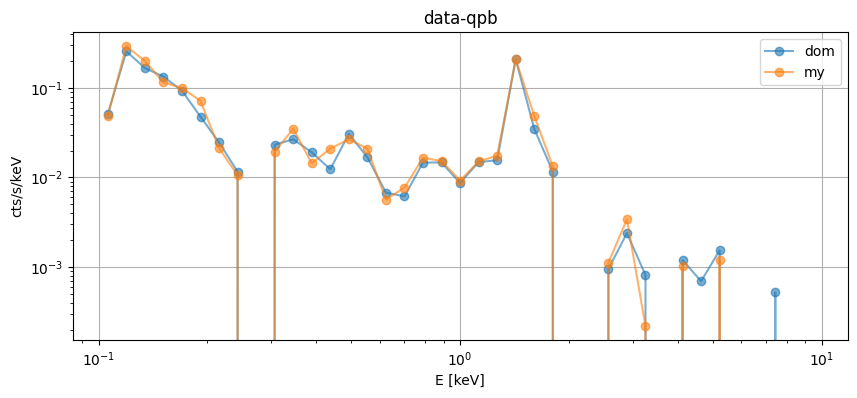

In [68]:
### ID ###
SRCNAME1 = 'ID3460'
SRCNAME2 = 'SDSSTG3460'

### par ###
REGNAME = 'bkg'

dompath = glob(f'/Users/eusracenorth/Documents/work/XGAP-ABUN/data/{SRCNAME1}/eckert/{SRCNAME1}/*')[0]
mypath = f'/Users/eusracenorth/Documents/work/XGAP-ABUN/data/{SRCNAME1}/fitting'
print(mypath)
with fits.open(f'{dompath}/{SRCNAME2}_{REGNAME}/mos1S001-obj-{SRCNAME2}_{REGNAME}.pi') as f:
    chan = f[1].data['CHANNEL']
    domspec_obj = f[1].data['COUNTS']
    exp = float(f[1].header['EXPOSURE'])
with fits.open(f'{dompath}/{SRCNAME2}_{REGNAME}/mos1S001-back-{SRCNAME2}_{REGNAME}.pi') as f:
    domspec_bkg = f[1].data['COUNTS']

with fits.open(f'{mypath}/{REGNAME}/mos1S001-fovt.pi') as f:
    myspec_obj = f[1].data['COUNTS']
with fits.open(f'{mypath}/{REGNAME}/mos1S001-bkg.pi') as f:
    myspec_bkg = f[1].data['COUNTS']

with fits.open(f'{dompath}/{SRCNAME2}_{REGNAME}/mos1S001-{SRCNAME2}_{REGNAME}.rmf') as f:
    emin = f[2].data['E_MIN']
    emax = f[2].data['E_MAX']


# # linearly Bin the data
# bin_factor = 10
# binned_emin = np.mean(emin.reshape(-1, bin_factor), axis=1)
# binned_chan = np.mean(chan.reshape(-1, bin_factor), axis=1)
# binned_domspec = np.sum(domspec.reshape(-1, bin_factor), axis=1)
# binned_myspec = np.sum(myspec.reshape(-1, bin_factor), axis=1)

## log bin the data
# Logarithmic binning parameters
min_energy_keV = 0.1  # Minimum energy in keV
max_energy_keV = 10.0  # Maximum energy in keV
num_bins = 40  # Number of logarithmic bins
# Create logarithmic energy bins
log_energy_bins = np.logspace(np.log10(min_energy_keV), np.log10(max_energy_keV), num_bins)

# Perform log binning
binned_energy = np.sqrt(log_energy_bins[:-1] * log_energy_bins[1:])
binned_domspec = np.histogram(emin, bins=log_energy_bins, weights=(domspec_obj-domspec_bkg) / exp)[0]
binned_myspec = np.histogram(emin, bins=log_energy_bins, weights=(myspec_obj-myspec_bkg) / exp)[0]

plt.figure(figsize=(10, 4))
# plt.plot(binned_chan, binned_domspec / exp, label = 'dom', marker='o', linestyle='-')
# plt.plot(binned_chan, binned_myspec / exp, label = 'my', marker='o', linestyle='-')
# plt.title('Channel versus Counts per Channel')
# plt.xlabel('Channel')
# plt.ylabel('cts/s/channel')

plt.plot(binned_energy, binned_domspec/np.diff(np.insert(binned_energy,0,0)), label = 'dom', marker='o', linestyle='-', alpha = 0.6)
plt.plot(binned_energy, binned_myspec/np.diff(np.insert(binned_energy,0,0)), label = 'my', marker='o', linestyle='-', alpha = 0.6)
plt.title('data-qpb')
plt.xlabel('E [keV]')
plt.ylabel('cts/s/keV')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)



PN

/Users/eusracenorth/Documents/work/XGAP-ABUN/data/ID3460/fitting


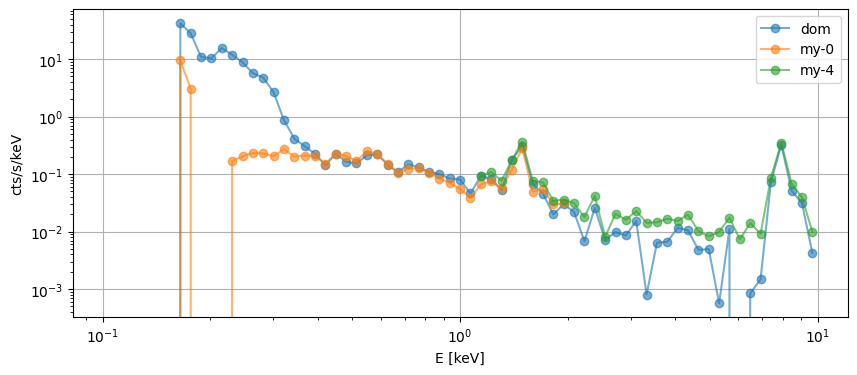

In [71]:
### ID ###
SRCNAME1 = 'ID3460'
SRCNAME2 = 'SDSSTG3460'

### par ###
REGNAME = 'bkg'

dompath = glob(f'/Users/eusracenorth/Documents/work/XGAP-ABUN/data/{SRCNAME1}/eckert/{SRCNAME1}/*')[0]
mypath = f'/Users/eusracenorth/Documents/work/XGAP-ABUN/data/{SRCNAME1}/fitting'
print(mypath)

with fits.open(f'{dompath}/{SRCNAME2}_bkg/pnS003-obj-{SRCNAME2}_bkg.pi') as f:
    chan = f[1].data['CHANNEL']
    exp = float(f[1].header['EXPOSURE'])
    domspec_obj = f[1].data['COUNTS']/exp

with fits.open(f'{dompath}/{SRCNAME2}_bkg/pnS003-back-{SRCNAME2}_bkg.pi') as f:
    domspec_bkg = f[1].data['RATE']

with fits.open(f'{mypath}/bkg/pnS003-0-fovt.pi') as f:
    myspec_0_obj = f[1].data['COUNTS']/exp

with fits.open(f'{mypath}/bkg/pnS003-4-fovt.pi') as f:
    myspec_4_obj = f[1].data['COUNTS']/exp

with fits.open(f'{mypath}/bkg/pnS003-0-bkg.pi') as f:
    myspec_0_bkg = f[1].data['RATE']

with fits.open(f'{mypath}/bkg/pnS003-4-bkg.pi') as f:
    myspec_4_bkg = f[1].data['RATE']

with fits.open(f'{dompath}/{SRCNAME2}_bkg/pnS003-{SRCNAME2}_bkg.rmf') as f:
    emin = f[2].data['E_MIN']
    emax = f[2].data['E_MAX']


# # linearly Bin the data
# bin_factor = 10
# binned_emin = np.mean(emin.reshape(-1, bin_factor), axis=1)
# binned_chan = np.mean(chan.reshape(-1, bin_factor), axis=1)
# binned_domspec = np.sum(domspec.reshape(-1, bin_factor), axis=1)
# binned_myspec = np.sum(myspec.reshape(-1, bin_factor), axis=1)

## log bin the data
# Logarithmic binning parameters
min_energy_keV = 0.1  # Minimum energy in keV
max_energy_keV = 10.0  # Maximum energy in keV
num_bins = 70  # Number of logarithmic bins
# Create logarithmic energy bins
log_energy_bins = np.logspace(np.log10(min_energy_keV), np.log10(max_energy_keV), num_bins)

# Perform log binning
binned_energy = np.sqrt(log_energy_bins[:-1] * log_energy_bins[1:])
binned_domspec = np.histogram(emin, bins=log_energy_bins, weights=domspec_obj-domspec_bkg)[0]
binned_myspec_0 = np.histogram(emin, bins=log_energy_bins, weights=myspec_0_obj-myspec_0_bkg)[0]
binned_myspec_4 = np.histogram(emin, bins=log_energy_bins, weights=myspec_4_obj-myspec_4_bkg)[0]

plt.figure(figsize=(10, 4))
# plt.plot(binned_chan, binned_domspec / exp, label = 'dom', marker='o', linestyle='-')
# plt.plot(binned_chan, binned_myspec / exp, label = 'my', marker='o', linestyle='-')
# plt.title('Channel versus Counts per Channel')
# plt.xlabel('Channel')
# plt.ylabel('cts/s/channel')

plt.plot(binned_energy, binned_domspec/np.diff(np.insert(binned_energy,0,0)), label = 'dom', marker='o', linestyle='-', alpha = 0.6)
pat0_msk = binned_energy<=2
plt.plot(binned_energy[pat0_msk], binned_myspec_0[pat0_msk]/np.diff(np.insert(binned_energy[pat0_msk],0,0)), label = 'my-0', marker='o', linestyle='-', alpha = 0.6)
pat4_msk = binned_energy>1
plt.plot(binned_energy[pat4_msk][1:], binned_myspec_4[pat4_msk][1:]/np.diff(binned_energy[pat4_msk]), label = 'my-4', marker='o', linestyle='-', alpha = 0.6)
# plt.plot(binned_energy, binned_myspec_4/np.diff(np.insert(binned_energy,0,0)), label = 'my-4', marker='o', linestyle='-', alpha = 0.3)

# plt.title('Channel versus Counts per Channel')
plt.xlabel('E [keV]')
plt.ylabel('cts/s/keV')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)

